# RBF neural net

In [1]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
torch.abs(torch.Tensor([[[1,2,3],[-1, -2, -3]]]))

tensor([[[1., 2., 3.],
         [1., 2., 3.]]])

In [3]:
# cpg model parameters
MI = 0.02
b1 = 0.01
b2 = 0.01
w11 = 1.4
w12 = 0.18 + MI
w21 = -0.18 - MI
w22 = 1.4
o1 = 0.01
o2 = 0.01
# W = [[w11,w21],[w12,w22]]
# O = [o1, o2]

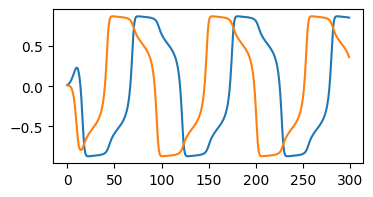

In [4]:
# cpg running
cpg_out = []
for i in range(300):
    o1 = tanh(o1*w11 + o2*w12 )
    o2 = tanh(o2*w22 + o1*w21 )
    cpg_out.append([o1, o2])
cpg_out = np.array(cpg_out)
plt.figure(figsize=(4,2))
plt.plot(cpg_out[:,0])
plt.plot(cpg_out[:,1])
# cpg_out

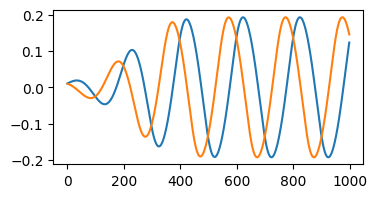

In [143]:
# SO2 oscillator from paper
cpg_out = []
omega = 0.01*pi
o1, o2 = 0.01, 0.01
for i in range(1000):
    o1 = tanh(1.01*( o1*cos(omega) + o2*sin(omega)))
    o2 = tanh(1.01*(-o1*sin(omega) + o2*cos(omega)))
    cpg_out.append([o1, o2])
cpg_out = np.array(cpg_out)
plt.figure(figsize=(4,2))
plt.plot(cpg_out[:,0])
plt.plot(cpg_out[:,1])
# cpg_out

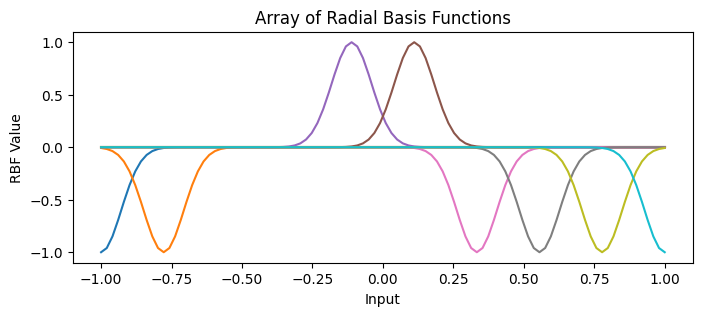

In [144]:
import numpy as np
import matplotlib.pyplot as plt

def generate_rbf_array(input_range, num_basis, centers, widths, weights):
    """
    Generates an array of Radial Basis Functions (RBFs) over a given input range.

    Args:
        input_range (tuple): Range of the input values (e.g., (0, 1)).
        num_basis (int): Number of basis functions.
        centers (ndarray): Array of centers for the basis functions.
        widths (ndarray): Array of widths for the basis functions.

    Returns:
        ndarray: Array of RBFs evaluated over the input range.
    """
    x = np.linspace(input_range[0], input_range[1], num=100)
    rbf_array = np.zeros((num_basis, len(x)))

    for i in range(num_basis):
        rbf_array[i] = weights[i]*np.exp(-widths[i] * (x - centers[i]) ** 2)

    return rbf_array

# Example usage
input_range = (-1, 1)
num_basis = 10
centers = np.linspace(input_range[0], input_range[1], num=num_basis)
widths = np.ones(num_basis) * 100
weights = np.random.randint(input_range[0], input_range[1]+1, 10,)

rbf_array = generate_rbf_array(input_range, num_basis, centers, widths, weights)

# Plotting the RBFs
plt.figure(figsize=(8, 3))
for i in range(num_basis):
    plt.plot(np.linspace(input_range[0], input_range[1], num=100), rbf_array[i], label=f'RBF {i+1}')
plt.xlabel('Input')
plt.ylabel('RBF Value')
plt.title('Array of Radial Basis Functions')
# plt.legend()
plt.show()

In [145]:
weights

array([-1, -1,  0,  0,  1,  1, -1, -1, -1, -1])

In [146]:
# cycle checker
T_step = 0
counter = 0
o1_p = 0
# for i in range(10000):
#     o1 = math.tanh(o1*w11 + o2*w12 )
#     o2 = math.tanh(o2*w22 + o1*w21 )
cpg_out = []
omega = 0.01*pi
o1, o2 = 0.01, 0.01
cpg_out = []
# Rbf network
input_range = (-1, 1)
num_basis = 10
centers = np.linspace(input_range[0], input_range[1], num=num_basis)
widths = np.ones(num_basis) * 100
x = np.linspace(input_range[0], input_range[1], num=100)
# weights = np.arange(input_range[0], input_range[1], 0.1)
rbf_array = np.zeros((num_basis, len(x)))
T_step = 201
phase = 0 # phase of oscillator
phase_array = []
for step in range(376):
    o1 = tanh(1.01*( o1*cos(omega) + o2*sin(omega)))
    o2 = tanh(1.01*(-o1*sin(omega) + o2*cos(omega)))

for step in range(600):
    o1 = tanh(1.01*( o1*cos(omega) + o2*sin(omega)))
    o2 = tanh(1.01*(-o1*sin(omega) + o2*cos(omega)))
    # phase = counter/T_step
    # print(t)
    # phase_array.append(phase)
    # cpg_out.append(o1)
    # counter += 1
    if o1_p < 0 and o1 > 0:
        T_step = counter
        print('T_step', T_step)
        print(T_step)
        print(o1_p, o1)
        print('cpg_out: ', len(cpg_out))
        print('phase_array: ', len(phase_array))
        # print('x: ', x)
        # RBF function
        rbf_array = np.zeros((num_basis, T_step))
        print('rbf_array: ', rbf_array.shape)
        for i in range(num_basis):
            rbf_array[i] = np.exp(-widths[i] * (phase_array - centers[i]) ** 2)
        counter = 0
        # Plotting the RBFs
        # plt.figure(figsize=(8, 3))
        # for i in range(num_basis):
        #     plt.plot(np.linspace(input_range[0], input_range[1], num=len(phase_array)), rbf_array[i], label=f'RBF {i+1}')
        # plt.plot(phase_array, np.sum(rbf_array, axis=0))
        # plt.plot(phase_array, cpg_out)
        # plt.xlabel('Input')
        # plt.ylabel('RBF Value')
        # plt.title('Array of Radial Basis Functions')
        # # plt.legend()
        # plt.show()
        cpg_out = []
        phase_array = []
    o1_p = o1


T_step 0
0
-0.002037866758872288 0.004020559159657686
cpg_out:  0
phase_array:  0
rbf_array:  (10, 0)
T_step 0
0
-0.004769327652237066 0.0012807960533901212
cpg_out:  0
phase_array:  0
rbf_array:  (10, 0)


o1, o2:  0.010411888659894014 0.009764390139326064
o1, o2:  0.01082017021613351 0.00951361222728827
o1, o2:  0.011224326102836102 0.00924765313274609
o1, o2:  0.011623832459260632 0.008966516029487436
o1, o2:  0.012018160623900665 0.00867022070313843
o1, o2:  0.012406777643953133 0.008358803847192951
o1, o2:  0.012789146799752842 0.008032319347709338
o1, o2:  0.01316472814372663 0.007690838556213438
o1, o2:  0.0135329790533844 0.007334450550337976
o1, o2:  0.01389335479782875 0.006963262381717988
o1, o2:  0.014245309117230534 0.006577399310650754
o1, o2:  0.014588294814684486 0.006177005027016458
o1, o2:  0.01492176435982755 0.005762241856942833
o1, o2:  0.015245170503572764 0.005333290954683206
o1, o2:  0.015557966903283793 0.004890352479163
o1, o2:  0.015859608757689554 0.004433645754634932
o1, o2:  0.01614955345081524 0.003963409414867971
o1, o2:  0.016427261204185334 0.0034799015302798817
o1, o2:  0.01669219573653629 0.0029833997174080404
o1, o2:  0.01694382493026145 0.002474201230

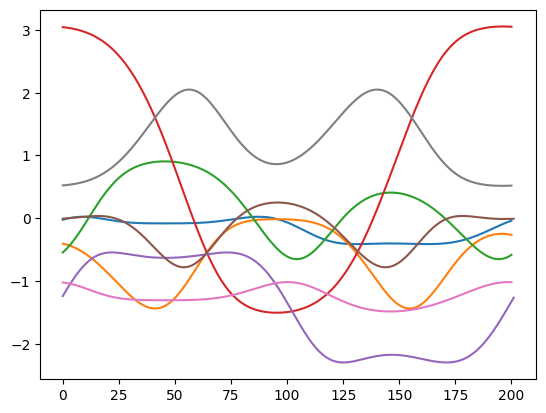

In [147]:
# RBF network re-produce paper
T_step = 0
counter = 0
o1_p = 0
# for i in range(10000):
#     o1 = math.tanh(o1*w11 + o2*w12 )
#     o2 = math.tanh(o2*w22 + o1*w21 )
cpg_out = []
omega = 0.01*pi
o1, o2 = 0.01, 0.01
cpg_out = []
# Rbf network
input_range = (-1, 1)
num_basis = 20
num_output = 2
centers = np.linspace(input_range[0], input_range[1], num=num_basis)
# widths = np.ones(num_basis) * 100
variance = 1/0.04
x = np.linspace(input_range[0], input_range[1], num=100)
# weights = np.arange(input_range[0], input_range[1], 0.1)
# weights = np.random.randint(input_range[0], input_range[1]+1, num_basis,)
weights = np.random.randn(num_output, num_basis)

# rbf_array = np.zeros((num_basis, len(x)))
rbf_array = []
T_step = 201
phase = 0 # phase of oscillator
phase_array = []
for step in range(376):
    o1 = tanh(1.01*( o1*cos(omega) + o2*sin(omega)))
    o2 = tanh(1.01*(-o1*sin(omega) + o2*cos(omega)))
    print('o1, o2: ', o1, o2)

for step in range(1000):
    o1 = tanh(1.01*( o1*cos(omega) + o2*sin(omega)))
    o2 = tanh(1.01*(-o1*sin(omega) + o2*cos(omega)))
    cpg_out = [[o1], [o2]]
    # print('o1', o1)
    rbf_array.append(np.sum(weights*np.exp(-variance*(cpg_out - centers) ** 2), axis=1))
    
    if o1_p < 0 and o1 > 0:
        counter = 0
        plt.plot(rbf_array)
        rbf_array = []
        weights = np.random.randn(num_output, num_basis)
        # print('weights: ', weights)
    o1_p = o1


In [148]:
from rbf_neural_net import RBFNet

In [149]:
model = RBFNet(1)

TypeError: RBFNet.__init__() missing 1 required positional argument: 'num_output'

In [ ]:
output = []
for i in range(300):
    output.append(model.forward())
    # print('output: ', output)
plt.plot(output)

### Test RBF GPU version

In [137]:
POPSIZE = 2
omega = 0.02*np.pi
o1 = torch.Tensor.repeat(torch.Tensor([0.00]), POPSIZE).unsqueeze(1)
o2 = torch.Tensor.repeat(torch.Tensor([0.18]), POPSIZE).unsqueeze(1)
O = torch.Tensor([[0.01, 0.18]]).expand(POPSIZE, 2)
# Rbf network
input_range = (-1, 1)
num_basis = 10
num_output = 9
centers = torch.linspace(input_range[0], input_range[1], num_basis)
variance = 1/0.04
x1 = np.linspace(0, 2*np.pi, num_basis)
y1 = np.sin(x1) * 0.5
# x2 = np.linspace(np.pi/2, 3*(np.pi)-np.pi/2, num_basis)
# y2 = np.sin(x2)
# print('y2: ', y2)
y2 = y1
for i in range(num_basis):
    y2 = np.delete(np.insert(y2, 0, y2[-1]), -1)
ze = np.array([1,1,1,1,1, 0,0,0,0,0])
print(ze)
weights = torch.Tensor([y1, y2*1.5, ze, y2, ze, ze, 
                        ze,  y2, -y2,  ze, -y2,  y2,
                        ze, ze, ze, ze, ze, ze]).T.repeat(POPSIZE, 1, 1)

# weights = torch.randn(POPSIZE, num_basis, num_output,)
rbf_array = []
W = torch.Tensor([[ cos(omega) ,  -sin(omega)], 
                  [ sin(omega) ,  cos(omega)]])

[1 1 1 1 1 0 0 0 0 0]


tensor([[-0.1100, -0.1650,  0.0677, -0.1100,  0.0677,  0.0677,  0.0677, -0.1100,
          0.1100,  0.0677,  0.1100, -0.1100,  0.0677,  0.0677,  0.0677,  0.0677,
          0.0677,  0.0677],
        [-0.1100, -0.1650,  0.0677, -0.1100,  0.0677,  0.0677,  0.0677, -0.1100,
          0.1100,  0.0677,  0.1100, -0.1100,  0.0677,  0.0677,  0.0677,  0.0677,
          0.0677,  0.0677]], dtype=torch.float64)


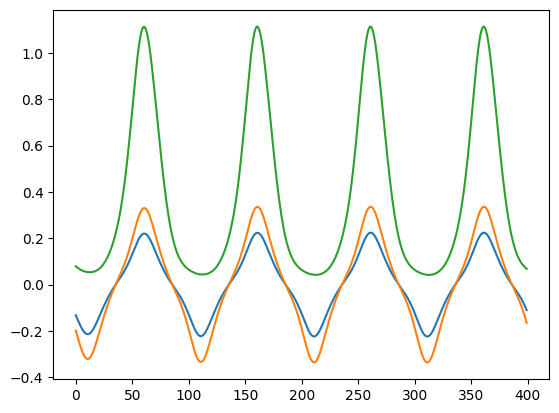

In [138]:
output = []
cpg_out = []
with torch.no_grad():
    for i in range(400):
        # o1 = torch.tanh(1.01*( o1p*cos(omega) + o2p*sin(omega)))
        # o2 = torch.tanh(1.01*(-o1p*sin(omega) + o2p*cos(omega)))
        O = torch.tanh(1.01*torch.matmul(O, W))
        # print('o1', o1)
        # posto1 = torch.sum(weights[0]*np.exp(variance*(o1 - centers)), dim=1)
        # posto2 = torch.sum(weights[1]*np.exp(variance*(o2 - centers)), dim=1)
        # a = torch.exp(-variance*torch.sum((O.reshape(POPSIZE, 2, 1).
        #                                    expand(POPSIZE,2,num_basis) - centers) ** 2, dim=1))
        post = torch.matmul(torch.exp(-variance*torch.sum((O.reshape(POPSIZE, 2, 1).
                    expand(POPSIZE,2,num_basis) - centers) ** 2, dim=1)).double(), weights.double())[:, 0]
        
        # cpg_out = torch.stack([posto1,posto2])
        output.append(post.tolist())
        o1p = o1
        o2p = o2
        cpg_out.append(o1, o2)
    print(post)
plt.plot(np.array(output)[:,0,0])
plt.plot(np.array(output)[:,0,1])
plt.plot(np.array(output)[:,0,2])
plt.plot(np.array(output)[:,0,2])
# plt.plot(output[:,1:2])

In [76]:
np.mean(np.array(output)[:,0, 2])

1.5569967363774777

In [45]:
torch.matmul(torch.exp(-variance*torch.sum(
    (O.unsqueeze(2).expand(POPSIZE, 2, num_basis) - centers)**2, dim=1)), weights)[:, 0]

tensor([[-0.6727,  0.4835,  0.7988,  0.1787, -0.1279, -0.5139, -0.4243,  0.2612],
        [ 0.7190, -0.3504, -0.4832,  0.1126, -0.7850, -0.4064,  0.4298,  0.0555]])

In [46]:
weights.shape

torch.Size([2, 20, 8])

In [33]:
torch.sum(torch.Tensor([[1, 2], 
                        [1, 0]]), dim=1)

tensor([3., 1.])

In [68]:
weights = torch.randn(POPSIZE, num_basis, num_output,)
weights

tensor([[[-0.2957, -1.3798,  0.2960],
         [ 1.7896,  0.1609, -0.4691],
         [ 0.5343,  0.0741,  0.7814],
         [ 0.8328, -0.8167, -1.3501],
         [-1.0589,  1.6796, -1.4094],
         [-1.2295, -0.7548,  0.8730],
         [ 1.7635,  1.0422,  0.2382],
         [-0.5680, -1.4055,  0.7501],
         [-1.5952, -1.4221,  2.4424],
         [ 0.6132, -0.3085, -1.8990]],

        [[-0.5321, -0.7746, -0.3253],
         [ 0.1124, -1.5939,  0.3691],
         [ 0.3244, -0.9982,  0.6867],
         [-0.1620, -0.9603,  0.7707],
         [ 0.5159,  0.2357,  0.5751],
         [-0.2927,  0.8869, -0.8366],
         [-1.6743,  0.2848,  0.5880],
         [-1.0717, -0.9117, -1.6018],
         [-1.9700, -0.6663,  0.2886],
         [-1.8080,  0.1876,  1.3601]]])

In [74]:
torch.matmul(a, weights)[:, 0]

tensor([[-0.8959, -0.3684,  0.5379],
        [-0.2543,  0.6800, -0.5371]])

In [72]:
torch.einsum('ij, klm -> ik', a, weights)

tensor([[-1.7936, -7.7139],
        [-1.7936, -7.7139]])

In [ ]:
# torch.einsum('bp,bqr->bpqr', v, M) # batch-wise operation v.shape=(b,p) M.shape=(b,q,r)
# torch.einsum('p,qr->pqr', v, M)    # cross-batch operation

torch.einsum('p,qr->pqr', -centers, O)    # cross-batch operation


In [1]:
from rbf_neural_net import RBFNet
model = RBFNet(2, 1)

In [2]:
model.forward([1])

tensor([[-0.0153],
        [-0.4699]], device='cuda:0')

In [3]:
model.get_params_a_model()

array([-0.64480275, -1.7044532 , -0.552579  , -0.29026932,  1.91367   ,
       -0.3436355 ,  1.6498233 ,  0.15280356, -0.10633513,  1.0233966 ],
      dtype=float32)

In [4]:
model.get_params()

array([-0.64480275, -1.7044532 , -0.552579  , -0.29026932,  1.91367   ,
       -0.3436355 ,  1.6498233 ,  0.15280356, -0.10633513,  1.0233966 ,
        1.0960946 ,  0.18574245, -0.800818  ,  0.2069356 , -1.1847703 ,
       -0.6082494 ,  1.2912514 , -0.9371579 , -1.1598206 ,  0.8090484 ],
      dtype=float32)

In [5]:
model.weights

tensor([[[-0.6448],
         [-1.7045],
         [-0.5526],
         [-0.2903],
         [ 1.9137],
         [-0.3436],
         [ 1.6498],
         [ 0.1528],
         [-0.1063],
         [ 1.0234]],

        [[ 1.0961],
         [ 0.1857],
         [-0.8008],
         [ 0.2069],
         [-1.1848],
         [-0.6082],
         [ 1.2913],
         [-0.9372],
         [-1.1598],
         [ 0.8090]]], device='cuda:0')

In [8]:
model.set_params(np.random.randn(2,1,10).flatten())

In [ ]:
np.random.randn(2,1,10).flatten()

array([-1.01640666,  0.84860013,  1.79264544,  0.09459468, -0.80453952,
       -0.68723667,  0.04438239,  1.53936716, -1.13220157, -0.67814333,
       -0.02244636, -1.22416589,  2.59157711, -2.3961546 , -1.67875475,
       -0.52285505,  0.45370571, -0.69159209,  0.38836375,  2.1324957 ])

In [9]:
model.get_weights()

tensor([[[-0.2998],
         [-1.2833]],

        [[-0.1875],
         [ 1.1906]],

        [[ 1.6328],
         [-0.8678]],

        [[ 0.2933],
         [ 1.9591]],

        [[ 1.0896],
         [ 0.7081]],

        [[-0.4846],
         [-0.9300]],

        [[-1.0398],
         [ 0.1644]],

        [[ 0.9696],
         [-0.1844]],

        [[ 0.3289],
         [ 0.2259]],

        [[ 1.0536],
         [-1.0840]]], device='cuda:0', dtype=torch.float64)

### Test self defined RBF weight

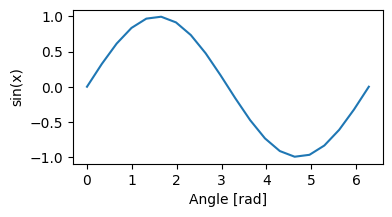

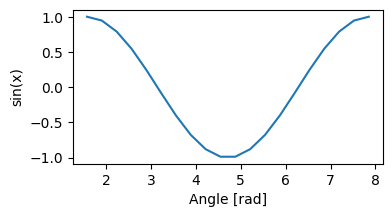

In [44]:
x = np.linspace(0, 2*np.pi, 20)
y1 = np.sin(x)
# 
# x = np.linspace(np.pi/2, 3*(np.pi)-np.pi/2, 20)
# y2 = np.sin(x)
plt.figure(figsize=(4,2))
plt.plot(x, y1)
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

x = np.linspace(np.pi/2, 3*(np.pi)-np.pi/2, 20)
y2 = np.sin(x)
plt.figure(figsize=(4,2))
plt.plot(x, y2)
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

In [2]:
x = np.linspace(0, 2*np.pi, 20)
y1 = np.sin(x)
x = np.linspace(np.pi/2, 3*(np.pi)-np.pi/2, 20)
y2 = np.sin(x)
print('y2: ', y2)
ze = np.zeros_like(y1)

y2:  [ 1.          0.94581724  0.78914051  0.54694816  0.24548549 -0.08257935
 -0.40169542 -0.67728157 -0.87947375 -0.9863613  -0.9863613  -0.87947375
 -0.67728157 -0.40169542 -0.08257935  0.24548549  0.54694816  0.78914051
  0.94581724  1.        ]


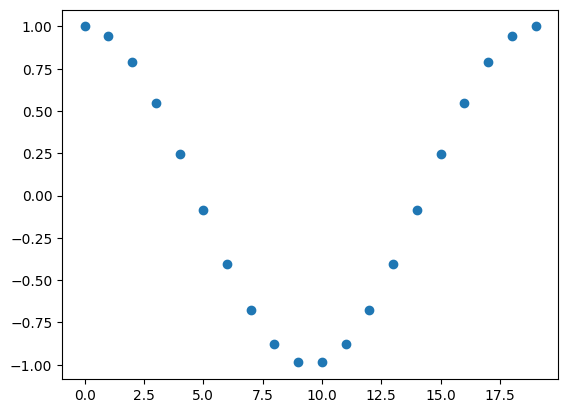

In [8]:
y1
plt.scatter(range(20), y2)

In [9]:
y2

array([ 1.        ,  0.94581724,  0.78914051,  0.54694816,  0.24548549,
       -0.08257935, -0.40169542, -0.67728157, -0.87947375, -0.9863613 ,
       -0.9863613 , -0.87947375, -0.67728157, -0.40169542, -0.08257935,
        0.24548549,  0.54694816,  0.78914051,  0.94581724,  1.        ])

In [57]:
y2

array([ 1.        ,  0.94581724,  0.78914051,  0.54694816,  0.24548549,
       -0.08257935, -0.40169542, -0.67728157, -0.87947375, -0.9863613 ,
       -0.9863613 , -0.87947375, -0.67728157, -0.40169542, -0.08257935,
        0.24548549,  0.54694816,  0.78914051,  0.94581724,  1.        ])

In [62]:
torch.Tensor([y1,y2, y2, y1,y2, y2, y1,y2, y2]).T.repeat(2,1,1)

tensor([[[ 0.0000e+00,  1.0000e+00,  1.0000e+00,  0.0000e+00,  1.0000e+00,
           1.0000e+00,  0.0000e+00,  1.0000e+00,  1.0000e+00],
         [ 3.2470e-01,  9.4582e-01,  9.4582e-01,  3.2470e-01,  9.4582e-01,
           9.4582e-01,  3.2470e-01,  9.4582e-01,  9.4582e-01],
         [ 6.1421e-01,  7.8914e-01,  7.8914e-01,  6.1421e-01,  7.8914e-01,
           7.8914e-01,  6.1421e-01,  7.8914e-01,  7.8914e-01],
         [ 8.3717e-01,  5.4695e-01,  5.4695e-01,  8.3717e-01,  5.4695e-01,
           5.4695e-01,  8.3717e-01,  5.4695e-01,  5.4695e-01],
         [ 9.6940e-01,  2.4549e-01,  2.4549e-01,  9.6940e-01,  2.4549e-01,
           2.4549e-01,  9.6940e-01,  2.4549e-01,  2.4549e-01],
         [ 9.9658e-01, -8.2579e-02, -8.2579e-02,  9.9658e-01, -8.2579e-02,
          -8.2579e-02,  9.9658e-01, -8.2579e-02, -8.2579e-02],
         [ 9.1577e-01, -4.0170e-01, -4.0170e-01,  9.1577e-01, -4.0170e-01,
          -4.0170e-01,  9.1577e-01, -4.0170e-01, -4.0170e-01],
         [ 7.3572e-01, -6.7728e-01

## RBF real one

202


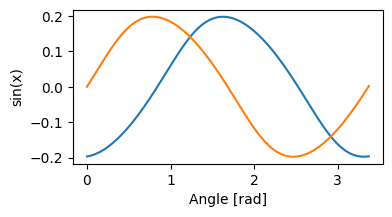

In [4]:
# SO(2) Parameters
phi   = 0.01*pi # SO(2) Frequency
alpha = 1.01         # SO(2) Alpha term
w11   = alpha*cos(phi)
w12   = alpha*sin(phi)
w21   =-w12
w22   = w11
x     = []
y     = []
t     = []

t.append(0)
x.append(-0.197)
y.append(0.0)

# Run for one period
period = 0
while y[period] >= y[0]:
    period = period+1
    t.append(period*0.0167)
    x.append(tanh(w11*x[period-1]+w12*y[period-1]))
    y.append(tanh(w22*y[period-1]+w21*x[period-1]))
    
while y[period] <= y[0]:
    period = period+1
    t.append(period*0.0167)
    x.append(tanh(w11*x[period-1]+w12*y[period-1]))
    y.append(tanh(w22*y[period-1]+w21*x[period-1]))
period = period
print(period)
plt.figure(figsize=(4,2))
plt.plot(t, x)
plt.plot(t, y)
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

[array([-0.00070915, -0.04669577, -0.14086408, -0.26387724, -0.36721874,
       -0.39288244, -0.34660026, -0.25222169, -0.12917732, -0.02630311])]
[array([ 0.        , -0.04598662, -0.14015493, -0.26316809, -0.36650959,
       -0.39217329, -0.34589111, -0.25151254, -0.12846817, -0.02559396])]
[array([ 0.00087909, -0.04510752, -0.13927583, -0.26228899, -0.36563049,
       -0.3912942 , -0.34501202, -0.25063345, -0.12758908, -0.02471487])]
[array([ 0.00192468, -0.04406193, -0.13823025, -0.2612434 , -0.3645849 ,
       -0.39024861, -0.34396643, -0.24958786, -0.12654349, -0.02366928])]
[array([ 0.00313344, -0.04285318, -0.13702149, -0.26003465, -0.36337615,
       -0.38903985, -0.34275767, -0.2483791 , -0.12533473, -0.02246052])]
[array([ 0.00450216, -0.04148446, -0.13565277, -0.25866593, -0.36200742,
       -0.38767113, -0.34138895, -0.24701038, -0.12396601, -0.0210918 ])]
[array([ 0.00602778, -0.03995884, -0.13412715, -0.25714031, -0.36048181,
       -0.38614552, -0.33986333, -0.24548477,

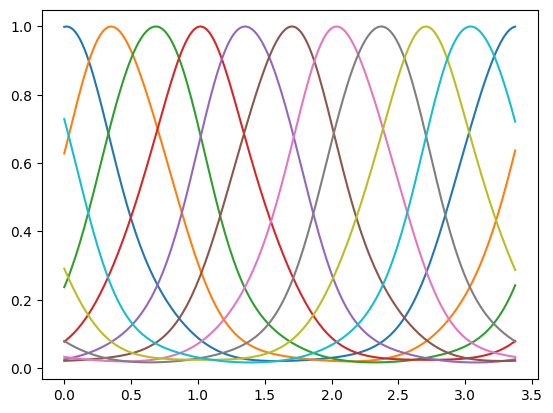

In [5]:
# RBFN Parameters
nc = 10;     # Number of kernels
W  = [0]*nc; # Weights 
s  = 0.04;   # Kernel variance
KENNE  = [0]*nc  # Kernels
_KENNE  = np.zeros((len(x), nc))  # Kernels

ci = np.asarray(np.around(np.linspace(1, period, nc+1)), dtype=int)

ci = ci[:-1]

cx = [0] * (len(ci))
cy = [0] * (len(ci))
cxy = [0] * (len(ci))

xy = x+y

for k in range(len(ci)):
    cx[k] = x[ci[k]]
    cy[k] = y[ci[k]]

for i in range(nc):
    rx   = [q - cx[i] for q in x]
    ry   = [q - cy[i] for q in y]
    KENNE[i] = np.exp(-(np.power((rx),2) + np.power((ry),2))/s)

for i in range(len(x)):
    _rx   = [x[i] - np.array(cx)]
    _ry   = [y[i] - np.array(cy)]
    print(_rx)
    _KENNE[i] = np.exp(-(np.power((_rx),2) + np.power((_ry),2))/s)[0]

for i in range(nc):
    plt.plot(t, KENNE[i])

print(cx)
print(cy)


In [24]:
def pre_compute_cpg():
    # Run for one period
    phi   = 0.01*pi # SO(2) Frequency
    alpha = 1.01         # SO(2) Alpha term
    w11   = alpha*cos(phi)
    w12   = alpha*sin(phi)
    w21   =-w12
    w22   = w11
    x     = []
    y     = []
    t     = []
    t.append(0)
    x.append(-0.197)
    y.append(0.0)
    period = 0
    while y[period] >= y[0]:
        period = period+1
        t.append(period*0.0167)
        x.append(tanh(w11*x[period-1]+w12*y[period-1]))
        y.append(tanh(w22*y[period-1]+w21*x[period-1]))
        
    while y[period] <= y[0]:
        period = period+1
        t.append(period*0.0167)
        x.append(tanh(w11*x[period-1]+w12*y[period-1]))
        y.append(tanh(w22*y[period-1]+w21*x[period-1]))
    period = period
    return t, x, y, period

POPSIZE = 2
omega = 0.01*np.pi
alpha = 1.01
W = torch.Tensor([[ cos(omega) ,  sin(omega)], 
                  [-sin(omega) ,  cos(omega)]])
o1 = torch.Tensor.repeat(torch.Tensor([0.00]), POPSIZE).unsqueeze(1)
o2 = torch.Tensor.repeat(torch.Tensor([0.18]), POPSIZE).unsqueeze(1)
O = torch.Tensor([[-0.197, 0.0]]).expand(POPSIZE, 2)
# O = torch.Tensor([[0.0, -0.2]]).expand(POPSIZE, 2)
t, x, y, period = pre_compute_cpg()
# Rbf network
num_basis = 20
num_output = 9
var = 25.0
KENNE  = [0]*num_basis  # Kernels
opposite_phase = int(period//2)
phase = torch.Tensor([0, 101])

ci = np.asarray(np.around(np.linspace(1, period, num_basis+1)), dtype=int)

ci = ci[:-1]

cx = [0] * (len(ci))
cy = [0] * (len(ci))
cxy = [0] * (len(ci))

xy = x+y

for k in range(len(ci)):
    cx[k] = x[ci[k]]
    cy[k] = y[ci[k]]

for i in range(num_basis):
    rx   = [q - cx[i] for q in x]
    ry   = [q - cy[i] for q in y]
    KENNE[i] = np.exp(-(np.power((rx),2) + np.power((ry),2))/0.04)
KENNE = torch.from_numpy(np.array(KENNE).T)

encode_type = 'semi-indirect'
cx = torch.Tensor(cx)
cy = torch.Tensor(cy)
weights = torch.randn(POPSIZE, num_basis, num_output,)
# if encode_type == 'semi-indirect':
#     weights = torch.randn(POPSIZE, num_basis, num_output/2,)
rbf_array = []
x1 = np.linspace(0, 2*np.pi, num_basis)
y1 = np.sin(x1) * 0.5
x2 = np.linspace(np.pi/2, 3*(np.pi)-np.pi/2, num_basis)
y2 = np.sin(x2) + 1.4
# print('y2: ', y2)
ze = np.zeros_like(y1)
# z = np.array([-1,0,0,0,0,0,0,0,0,1])
weights = torch.Tensor([ ze, y1, ze]).T.repeat(POPSIZE, 1, 1)

# weights = torch.Tensor([  y1,-y1, y1, -y1, y1,-y1, 
#                          -y1,-y1, y1,  y1, y1,-y1,
#                           10+y1, y1,-y1, -y1,-y1, y1]).T.repeat(POPSIZE, 1, 1)
# w = torch.Tensor([ y1,-y1, y1, 
#                   -y1,-y1, y1,
#                    y1, y1,-y1]).reshape(3,3).repeat(1,2)
weights = torch.rand(POPSIZE, num_basis, 9)

# weights = torch.Tensor([  ze,ze, ze,ze,ze,ze,
#                         ze,ze, ze,ze,ze,ze,
#                         ze,ze, ze,ze,ze,ze]).T.repeat(POPSIZE, 1, 1).cuda()


In [25]:
p1 = KENNE[int(phase[0])]
p2 = KENNE[int(phase[1])]
p2

tensor([0.0211, 0.0253, 0.0325, 0.0465, 0.0780, 0.1488, 0.2864, 0.4925, 0.7217,
        0.9152, 0.9990, 0.8800, 0.6289, 0.3940, 0.2380, 0.1402, 0.0776, 0.0418,
        0.0256, 0.0204], dtype=torch.float64)

tensor([[2.6235, 3.2241, 3.3281, 3.7015, 3.3867, 3.9409, 2.4269, 3.2301, 3.9369,
         3.3960, 2.6712, 3.3222, 3.3992, 2.4305, 2.7945, 3.7715, 2.0725, 3.5796],
        [3.5782, 2.3177, 3.4358, 2.7729, 2.6489, 1.6873, 3.5803, 4.0353, 2.7685,
         2.7784, 2.6057, 2.7918, 3.5286, 3.0905, 3.5770, 3.8543, 4.1486, 3.5613]])
tensor([[2.6087, 3.2602, 3.3149, 3.7170, 3.3811, 3.9484, 2.4321, 3.2615, 3.9177,
         3.4063, 2.6619, 3.3035, 3.3903, 2.4371, 2.8176, 3.7799, 2.0846, 3.5980],
        [3.6104, 2.3454, 3.4115, 2.7786, 2.6581, 1.6908, 3.5635, 4.0479, 2.7865,
         2.7834, 2.6075, 2.7919, 3.5202, 3.0838, 3.6044, 3.8637, 4.1305, 3.5589]])
tensor([[2.5946, 3.2950, 3.3010, 3.7326, 3.3740, 3.9554, 2.4385, 3.2924, 3.8980,
         3.4164, 2.6529, 3.2850, 3.3807, 2.4434, 2.8422, 3.7888, 2.0978, 3.6153],
        [3.6413, 2.3735, 3.3867, 2.7854, 2.6679, 1.6942, 3.5466, 4.0606, 2.8047,
         2.7889, 2.6097, 2.7927, 3.5116, 3.0770, 3.6308, 3.8717, 4.1115, 3.5561]])
tensor([[2.5812, 3.

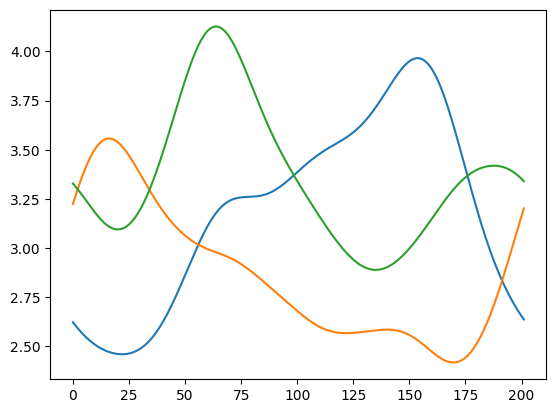

In [26]:
output = []
with torch.no_grad():
    # phase = 0
    for i in range(202):
        # print(period)
        p1 = KENNE[int(phase[0])]
        p2 = KENNE[int(phase[1])]
        # rbf_out = torch.stack([p1, p2, p1, p2, p1, p2])
        # o1 = torch.tanh(1.01*( o1p*cos(omega) + o2p*sin(omega)))
        # o2 = torch.tanh(1.01*(-o1p*sin(omega) + o2p*cos(omega)))
        # O = torch.tanh(1.01*torch.matmul(O, W))
        # print('o1', o1)
        # posto1 = torch.sum(weights[0]*np.exp(variance*(o1 - centers)), dim=1)
        # posto2 = torch.sum(weights[1]*np.exp(variance*(o2 - centers)), dim=1)
        # a = torch.exp(-var * ((x[period]-cx) ** 2 + (y[period]-cy) ** 2))
        out_p1 = torch.matmul(p1.float(), weights)
        out_p2 = torch.matmul(p2.float(), weights)
        # post = torch.concat([out_p1[:, 0:3], out_p2[:, 3:6], out_p1[:, 6:9]], dim=1)
        outL = torch.concat([out_p1[:, 0:3], out_p2[:, 3:6], out_p1[:, 6:9]], dim=1)
        outR = torch.concat([out_p2[:, 0:3], out_p1[:, 3:6], out_p2[:, 6:9]], dim=1)
        post = torch.concat([outL, outR], dim=1)
        # post = torch.matmul(KENNE[phase].float(), weights)
        
        # # cpg_out = torch.stack([posto1,posto2])
        output.append(post.tolist())
        # o1p = o1
        # o2p = o2

        phase = phase + 1
        for index, j in enumerate(phase):
            if j > 201:
                phase[index] = 0    
        print(post)
plt.plot(np.array(output)[:,0,0])
plt.plot(np.array(output)[:,0,1])
plt.plot(np.array(output)[:,0,2])
# plt.plot(output[:,1:2])

In [74]:
# i = torch.stack([p1,p1,p1,
#                   p2,p2,p2,
#                   p1,p1,p1]).T.expand(2, 20, 9)   # .repeat(1, 1, 1)
i = torch.stack([p1, p1, p2]).T.expand(2, 20, 3)   # .repeat(1, 1, 1)

print(i)
print(i.shape)


tensor([[[0.9972, 0.9972, 0.0209],
         [0.8665, 0.8665, 0.0256],
         [0.6108, 0.6108, 0.0335],
         [0.3783, 0.3783, 0.0486],
         [0.2270, 0.2270, 0.0822],
         [0.1336, 0.1336, 0.1572],
         [0.0742, 0.0742, 0.3016],
         [0.0402, 0.0402, 0.5149],
         [0.0247, 0.0247, 0.7458],
         [0.0199, 0.0199, 0.9313],
         [0.0211, 0.0211, 0.9961],
         [0.0257, 0.0257, 0.8600],
         [0.0336, 0.0336, 0.6030],
         [0.0487, 0.0487, 0.3723],
         [0.0825, 0.0825, 0.2231],
         [0.1577, 0.1577, 0.1311],
         [0.3023, 0.3023, 0.0728],
         [0.5152, 0.5152, 0.0395],
         [0.7456, 0.7456, 0.0244],
         [0.9312, 0.9312, 0.0198]],

        [[0.9972, 0.9972, 0.0209],
         [0.8665, 0.8665, 0.0256],
         [0.6108, 0.6108, 0.0335],
         [0.3783, 0.3783, 0.0486],
         [0.2270, 0.2270, 0.0822],
         [0.1336, 0.1336, 0.1572],
         [0.0742, 0.0742, 0.3016],
         [0.0402, 0.0402, 0.5149],
         [0.0247, 

In [76]:
j = out_p1.unsqueeze(2).expand(-1,-1, 3).transpose(1,2)
j

tensor([[[2.6377, 3.2015, 3.3398, 3.4086, 2.4285, 2.7834, 2.4278, 3.2112,
          3.9537],
         [2.6377, 3.2015, 3.3398, 3.4086, 2.4285, 2.7834, 2.4278, 3.2112,
          3.9537],
         [2.6377, 3.2015, 3.3398, 3.4086, 2.4285, 2.7834, 2.4278, 3.2112,
          3.9537]],

        [[3.5584, 2.3018, 3.4554, 3.5381, 3.0981, 3.5604, 3.5956, 4.0308,
          2.7596],
         [3.5584, 2.3018, 3.4554, 3.5381, 3.0981, 3.5604, 3.5956, 4.0308,
          2.7596],
         [3.5584, 2.3018, 3.4554, 3.5381, 3.0981, 3.5604, 3.5956, 4.0308,
          2.7596]]])

In [13]:
y1 = torch.Tensor([1,2,3,4,5])
ze = torch.Tensor([0,0,0,0,0])
w = torch.rand(2, 20, 9)
# w = torch.stack([ y1, -y1, ze])
w

tensor([[[0.6761, 0.2966, 0.1144, 0.9226, 0.6456, 0.5830, 0.4074, 0.8379,
          0.5856],
         [0.5276, 0.5623, 0.2846, 0.8493, 0.9977, 0.4558, 0.1780, 0.4028,
          0.2790],
         [0.3978, 0.6999, 0.7994, 0.7339, 0.2415, 0.1970, 0.6228, 0.7322,
          0.9370],
         [0.9886, 0.6775, 0.3458, 0.8903, 0.7698, 0.8174, 0.9239, 0.4233,
          0.5011],
         [0.5759, 0.1245, 0.5724, 0.0289, 0.2350, 0.3901, 0.9991, 0.3976,
          0.6896],
         [0.3584, 0.5697, 0.7549, 0.6098, 0.0938, 0.1676, 0.2845, 0.0816,
          0.9702],
         [0.5488, 0.1217, 0.3569, 0.7757, 0.3744, 0.1002, 0.6817, 0.6597,
          0.7521],
         [0.8317, 0.9318, 0.1790, 0.1489, 0.8731, 0.3756, 0.0543, 0.7203,
          0.9975],
         [0.7524, 0.9392, 0.7901, 0.2586, 0.9332, 0.0617, 0.0159, 0.0702,
          0.5219],
         [0.4857, 0.9315, 0.9462, 0.9999, 0.3997, 0.9356, 0.8048, 0.8081,
          0.3721],
         [0.8848, 0.4633, 0.6299, 0.1824, 0.3890, 0.4252, 0.4368, 0.95

In [14]:
out_p1 = torch.matmul(p1.float(), w)
out_p2 = torch.matmul(p2.float(), w)
print(out_p1)
print('-----')
print(out_p2)

tensor([[3.3349, 3.2507, 2.4237, 3.5039, 3.6940, 3.5159, 2.9998, 2.8363, 3.1986],
        [4.1503, 3.9335, 2.6491, 2.7986, 2.7791, 2.5495, 4.0825, 2.5194, 2.6341]])
-----
tensor([[3.7516, 4.0572, 3.5909, 3.3126, 3.0182, 2.6316, 2.3656, 3.4089, 3.0504],
        [3.6648, 3.5304, 4.0610, 2.8876, 4.3555, 2.4313, 3.7351, 2.9762, 3.5259]])


In [15]:
outL = torch.concat([out_p1[:, 0:3], out_p2[:, 3:6], out_p1[:, 6:9]], dim=1)
outL

tensor([[3.3349, 3.2507, 2.4237, 3.3126, 3.0182, 2.6316, 2.9998, 2.8363, 3.1986],
        [4.1503, 3.9335, 2.6491, 2.8876, 4.3555, 2.4313, 4.0825, 2.5194, 2.6341]])

In [16]:
outR = torch.concat([out_p2[:, 0:3], out_p1[:, 3:6], out_p2[:, 6:9]], dim=1)
outR

tensor([[3.7516, 4.0572, 3.5909, 3.5039, 3.6940, 3.5159, 2.3656, 3.4089, 3.0504],
        [3.6648, 3.5304, 4.0610, 2.7986, 2.7791, 2.5495, 3.7351, 2.9762, 3.5259]])

In [17]:
torch.concat([outL, outR], dim=1)

tensor([[3.3349, 3.2507, 2.4237, 3.3126, 3.0182, 2.6316, 2.9998, 2.8363, 3.1986,
         3.7516, 4.0572, 3.5909, 3.5039, 3.6940, 3.5159, 2.3656, 3.4089, 3.0504],
        [4.1503, 3.9335, 2.6491, 2.8876, 4.3555, 2.4313, 4.0825, 2.5194, 2.6341,
         3.6648, 3.5304, 4.0610, 2.7986, 2.7791, 2.5495, 3.7351, 2.9762, 3.5259]])

In [18]:
# p1 = KENNE[int(phase[0])]
# p2 = KENNE[int(phase[1])]
p1 = torch.Tensor([1]).expand(5)
p2 = torch.Tensor([-1]).expand(5)
# p3 = torch.Tensor([0]).expand(5)
rbf_out = torch.stack([p1, p2, p1, p2, p1, p2])
rbf_out

tensor([[ 1.,  1.,  1.,  1.,  1.],
        [-1., -1., -1., -1., -1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [-1., -1., -1., -1., -1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [-1., -1., -1., -1., -1.]])

In [19]:
weights

tensor([[[0.3520, 0.7931, 0.3591, 0.4571, 0.0614, 0.3556, 0.8707, 0.8223,
          0.8619],
         [0.7759, 0.4734, 0.2037, 0.2963, 0.8430, 0.8717, 0.7863, 0.3707,
          0.7227],
         [0.9511, 0.8259, 0.4391, 0.7814, 0.2504, 0.6649, 0.1240, 0.1981,
          0.5691],
         [0.4435, 0.6390, 0.0686, 0.4126, 0.2126, 0.1918, 0.8908, 0.2913,
          0.7152],
         [0.4233, 0.2732, 0.7750, 0.8631, 0.4405, 0.1490, 0.1238, 0.6202,
          0.9783],
         [0.8227, 0.3409, 0.0416, 0.5525, 0.7582, 0.4891, 0.5938, 0.0520,
          0.8266],
         [0.2209, 0.6427, 0.1945, 0.1746, 0.2980, 0.0286, 0.9534, 0.7889,
          0.1858],
         [0.4833, 0.3323, 0.9730, 0.2887, 0.2160, 0.4346, 0.3596, 0.7219,
          0.4691],
         [0.7817, 0.6375, 0.5967, 0.9704, 0.4257, 0.5752, 0.9835, 0.9426,
          0.0161],
         [0.3144, 0.8035, 0.8574, 0.1064, 0.2958, 0.9449, 0.6125, 0.9877,
          0.1800],
         [0.8783, 0.5217, 0.1135, 0.5450, 0.3772, 0.0597, 0.0866, 0.02

In [34]:
for i in rbf_out:
    print(i)

tensor([1., 1., 1., 1., 1.])
tensor([-1., -1., -1., -1., -1.])
tensor([1., 1., 1., 1., 1.])
tensor([-1., -1., -1., -1., -1.])
tensor([1., 1., 1., 1., 1.])
tensor([-1., -1., -1., -1., -1.])


In [31]:
torch.matmul(rbf_out.float(), weights)

tensor([[[ 0.0000,  0.1950,  0.0000],
         [ 0.0000, -0.2345,  0.0000],
         [ 0.0000,  0.1950,  0.0000],
         [ 0.0000, -0.2345,  0.0000],
         [ 0.0000,  0.1950,  0.0000],
         [ 0.0000, -0.2345,  0.0000]],

        [[ 0.0000,  0.1950,  0.0000],
         [ 0.0000, -0.2345,  0.0000],
         [ 0.0000,  0.1950,  0.0000],
         [ 0.0000, -0.2345,  0.0000],
         [ 0.0000,  0.1950,  0.0000],
         [ 0.0000, -0.2345,  0.0000]]])

In [25]:
weights = torch.randn(POPSIZE, num_basis, num_output/2,)

TypeError: randn(): argument 'size' must be tuple of ints, but found element of type float at pos 3

In [117]:
a = torch.rand([2,6])
a = torch.where(a > .5, 1, 0)
a

tensor([[1, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 1, 0]])

In [118]:
c1 = a[:, 0] + a[:, 2] + a[:, 4]
c2 = a[:, 1] + a[:, 3] + a[:, 5]
o1 = torch.where(c1 < 1 , 1, 0)
o2 = torch.where(c2 < 1 , 1, 0)
o3 = torch.where(c1 > 2 , 1, 0)
o4 = torch.where(c2 > 2 , 1, 0)
o1 + o2 + o3 + o4 -2 

tensor([-1, -2])